In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import pickle

In [2]:
with open('/root/workspace/var-wold/memetracker-results-3.pk', 'rb') as f:
    data = pickle.load(f)
df = pd.DataFrame(data)
df

,chunk_idx,chunk_total,vi_ll,vi_coeffs_hat,gb_ll,gb_coeffs_hat
0,0,20,-0.245125,"[tensor(0.0110, dtype=torch.float64), tensor(0...",-0.298696,"[tensor(0.1284, dtype=torch.float64), tensor(0..."
1,1,20,-0.904514,"[tensor(0.0175, dtype=torch.float64), tensor(0...",-0.479017,"[tensor(0.2172, dtype=torch.float64), tensor(0..."
2,2,20,0.345065,"[tensor(0.0081, dtype=torch.float64), tensor(0...",-0.597054,"[tensor(0.0796, dtype=torch.float64), tensor(0..."
3,3,20,0.411200,"[tensor(0.0049, dtype=torch.float64), tensor(0...",-0.378059,"[tensor(0.0317, dtype=torch.float64), tensor(0..."
4,4,20,-0.275151,"[tensor(0.0054, dtype=torch.float64), tensor(0...",-0.567664,"[tensor(0.0464, dtype=torch.float64), tensor(0..."
5,5,20,-0.312962,"[tensor(0.0052, dtype=torch.float64), tensor(0...",-0.364055,"[tensor(0., dtype=torch.float64), tensor(0.075..."
6,6,20,0.310471,"[tensor(0.0053, dtype=torch.float64), tensor(0...",-0.542706,"[tensor(0.0412, dtype=torch.float64), tensor(0..."
7,7,20,0.359791,"[tensor(0.0054, dtype=torch.float64), tensor(0...",-0.431638,"[tensor(0.0413, dtype=torch.float64), tensor(0..."
8,8,20,0.255880,"[tensor(0.0053, dtype=torch.float64), tensor(0...",-0.401929,"[tensor(0.0378, dtype=torch.float64), tensor(0..."
9,9,20,0.148026,"[tensor(0.0053, dtype=torch.float64), tensor(0...",-0.404437,"[tensor(0.0406, dtype=torch.float64), tensor(0..."


In [14]:
dim = 94
coeffs = np.array(df.loc[17]['vi_coeffs_hat'])

mu = coeffs[:dim]
beta = np.reshape(coeffs[dim:dim**2+dim], (dim, dim))
alpha = np.reshape(coeffs[dim+dim**2:], (dim, dim))

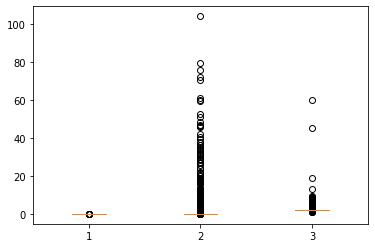

In [17]:
plt.boxplot([mu.flatten(), alpha.flatten(), beta.flatten()]);

In [3]:
vi_ll = df.vi_ll.tolist()
gb_ll = df.gb_ll.tolist()

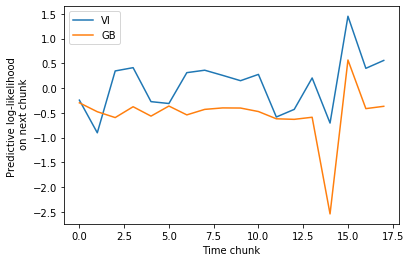

In [4]:
plt.plot(df.vi_ll.tolist(), label='VI')
plt.plot(df.gb_ll.tolist(), label='GB')
plt.xlabel('Time chunk')
plt.legend()
plt.ylabel('Predictive log-likelihood \n on next chunk');

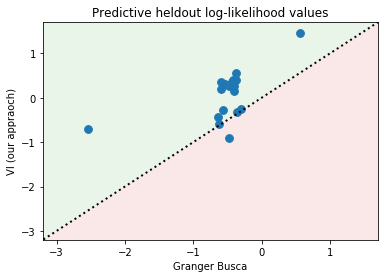

In [5]:
fig, ax = plt.subplots(1, 1)

plt.scatter(gb_ll, vi_ll, s=60)
xlims = ax.get_xlim()
ylims = ax.get_ylim()

plt.plot([-10, 10], [-10, 10], c='k', lw=2, ls=':')
ax.set_xlim(-3.2, 1.7)
ax.set_ylim(-3.2, 1.7)

plt.fill([-10, 10, -10], [-10, 10, 10], color='C2', alpha=0.1, lw=0, zorder=-100)
plt.fill([10, 10, -10], [-10, 10, -10], color='C3', alpha=0.1, lw=0, zorder=-100)

plt.xlabel('Granger Busca')
plt.ylabel('VI (our appraoch)')
plt.title('Predictive heldout log-likelihood values');
